In [148]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
from matplotlib.colors import LogNorm

from utils import distance
from utils import CommonFunctions as CF

from seaborn import hls_palette

import importlib
importlib.reload(distance)
importlib.reload(CF)

import networkx as nx

from rpy2 import robjects

# Hierarchical modular

In [2]:
### Parameters
def myHMN(nlevels, m0=2, bsize=2, prob=1/4, alfa=4, p=1, verbose=False):
    '''
    m0 = size of initial moduli
    s = number of levels
    b = number of moduli clustered at each level
    pl = alfa * p**l = level-dependent wiring probabilities
    random -> whether initial moduli are fully-connected or random
    '''
    
    ### T0D0: CONVERT TO SPARSE MATRIX
    ### TODO: IF P-LEVEL EQUAL 1, ADD BY DEFAULT
    n_blocks = bsize**nlevels
    N = m0 * n_blocks
    print('size:', N)
    
    block_size_level = m0* bsize**np.arange(nlevels)
    n_blocks_level = N // block_size_level
    p_level = alfa * prob**np.arange(1,nlevels+1)
    n_link_level =  (p_level*block_size_level**2).astype(int)
    
    if verbose:
        print('block_size_level:', block_size_level)
        print('n_blocks_level:', n_blocks_level)
        print('n_link_level:', n_link_level)
    
    ### Create empty adj
    adj = np.zeros((N,N))
    
    ### Create initial blocks
    if p<1:
        template = np.random.rand(m0,m0)
        # Select the entries with value <= p
        template = np.where(template <= p, 1, 0).astype(int)
    elif p==1:
        template = np.ones((m0,m0))
    else:
        raise ValueError('p must be 0<p<1.')
    
    # Remove self-loops
    template = template - np.eye(m0)
        
    # Add
    idx = np.arange(n_blocks) * m0
    for i in idx:
        adj[i:i+m0,i:i+m0] = template
        
    ### Loop over levels
    print('Loop over levels...')
    for level in range(nlevels):
        
        block_size = block_size_level[level]
        n_link_to_add = n_link_level[level]
        
        if verbose:
            print(f'[*] LEVEL {level+1}')
            print('block size:', block_size, ', n link to add:', n_link_to_add)
        
        if n_link_to_add>block_size**2:
            if verbose: print('WARNING: n link to add is larger than block size...')
            n_link_to_add = block_size**2
        
        # Loop over couple of blocks
        for i in range(n_blocks_level[level]-1):
            idx_i = np.arange(block_size) + i*block_size
            idx_j = idx_i + block_size
                
            new_links = np.random.choice(np.arange(block_size**2), replace=False, size=n_link_to_add)
                
            new_i = [idx_i[x%block_size] for x in new_links]
            new_j = [idx_j[x//block_size] for x in new_links]
                
            adj[new_i,new_j] = 1
            adj[new_j,new_i] = 1
                
    return adj

In [225]:
adj = myHMN(nlevels=3, prob=1/4, alfa=1, verbose=True, m0=16, p=1)

size: 128
block_size_level: [16 32 64]
n_blocks_level: [8 4 2]
n_link_level: [64 64 64]
Loop over levels...
[*] LEVEL 1
block size: 16 , n link to add: 64
[*] LEVEL 2
block size: 32 , n link to add: 64
[*] LEVEL 3
block size: 64 , n link to add: 64


In [226]:
HMshape = [2,2,32]
avklist = [1,2,20]
adj = HM.HMRandomGraph(HMshape, avklist)

In [216]:
HMshape = [2,2,2,16]
avklist = [1,2,6,13]
adj2 = HM.HMRandomGraph(HMshape, avklist)

In [9]:
np.save(f'networks/levels_{3}_p_{0.25}_alfa_{1}_m0_{16}.npy', adj)

In [5]:
G = nx.from_numpy_array(adj)
print(nx.is_connected(G))

True


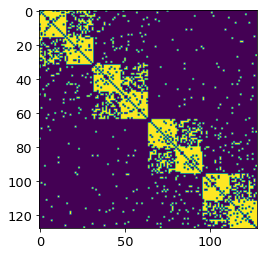

In [217]:
plt.imshow(adj2)
plt.show()

In [30]:
G = nx.from_numpy_array(adj)
print(nx.is_connected(G))

True


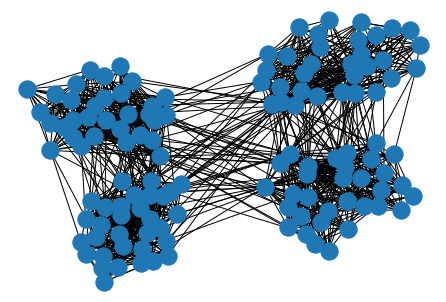

In [199]:
nx.draw(G)

# HM with core-periphery structure

In [10]:
from galib import models as HM

In [171]:
HMshape = [2,4,16]
avklist = [1,3,13]
gammalist = [1.5,1.5,100]

cp = HM.HMCentralisedGraph(HMshape, avklist, gammalist)

In [191]:
HMshape = [2,2,2,16]
avklist = [1,2,6,13]
gammalist = [2,2,2,100]

cp2 = HM.HMCentralisedGraph(HMshape, avklist, gammalist)

In [46]:
HMshape = [2,4,16]
avklist = [1,3,13]
gammalist = [2,2,100]

cp3 = HM.HMCentralisedGraph(HMshape, avklist, gammalist)

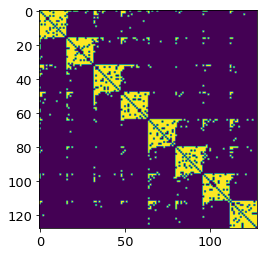

In [172]:
plt.imshow(cp)
plt.show()

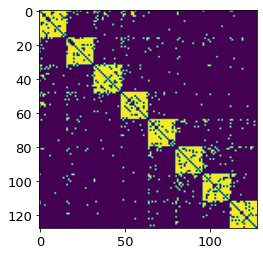

In [47]:
plt.imshow(cp3)
plt.show()

True


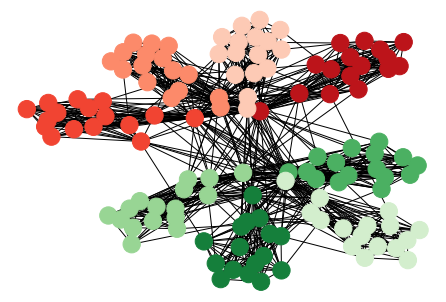

In [177]:
G = nx.from_numpy_array(cp)
print(nx.is_connected(G))
nx.draw(G, node_color=cs)

True


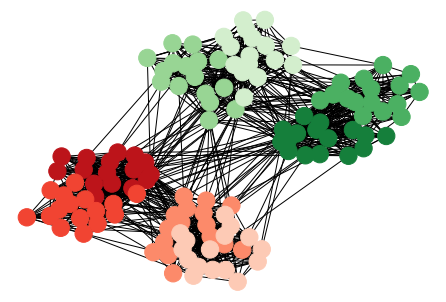

In [192]:
G = nx.from_numpy_array(cp2)
print(nx.is_connected(G))
nx.draw(G, node_color=cs)

In [164]:
from matplotlib.cm import get_cmap
offs = 2
reds = get_cmap('Reds_r', HMshape[1]+offs)
blues = get_cmap('Greens_r', HMshape[1]+offs)

c1 = [ reds(i) for i in np.arange(1,HMshape[1]+1)]
c2 = [ blues(i) for i in np.arange(1,HMshape[1]+1)]

c1 = np.repeat(c1, HMshape[2], axis=0)
c2 = np.repeat(c2, HMshape[2], axis=0)

cs = np.concatenate([c1, c2])

True


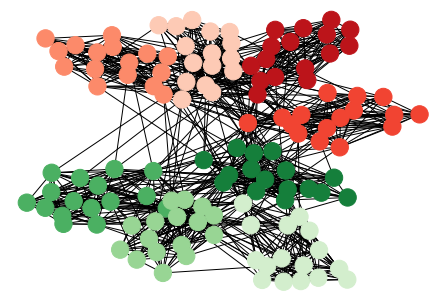

In [170]:
G3 = nx.from_numpy_array(cp3)
print(nx.is_connected(G3))
nx.draw(G3,node_color=cs)

# Diffusion distance

DIFFUSION DISTANCE
- Compute laplacian...
1 1
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:263: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


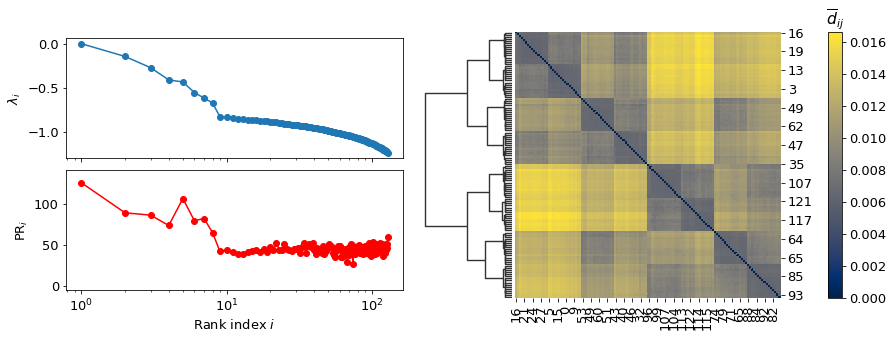

In [7]:
res_gn = distance.diffusion_distance(adj, args=[1, 1], name=None)

DIFFUSION DISTANCE
- Compute laplacian...
1 1
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


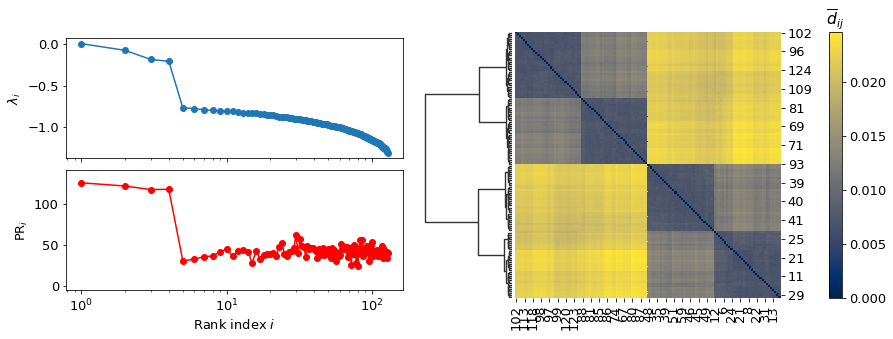

In [227]:
res_gn = distance.diffusion_distance(adj, args=[1, 1], name=None)

DIFFUSION DISTANCE
- Compute laplacian...
1 1
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


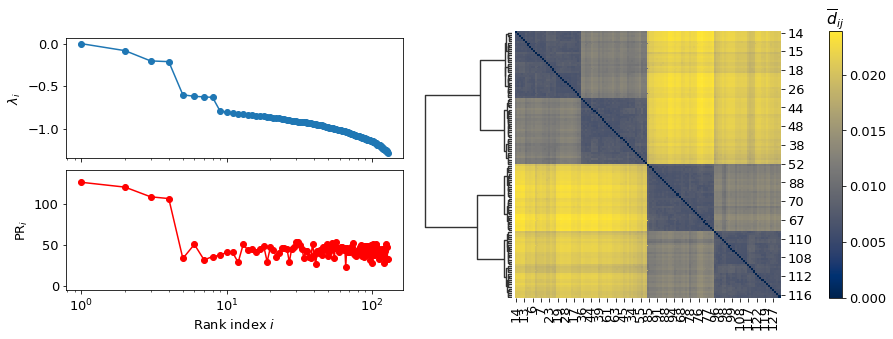

In [218]:
res_gn = distance.diffusion_distance(adj2, args=[1, 1], name=None)

DIFFUSION DISTANCE
- Compute laplacian...
1 1
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


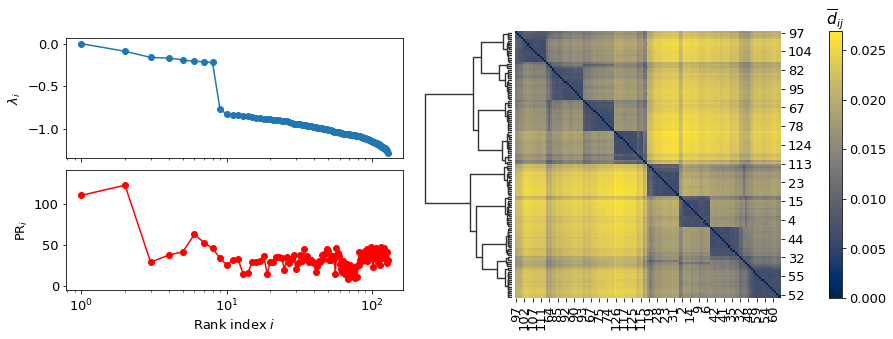

In [181]:
res_gn = distance.diffusion_distance(cp, args=[1, 1], name=None)

DIFFUSION DISTANCE
- Compute laplacian...
1 1
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


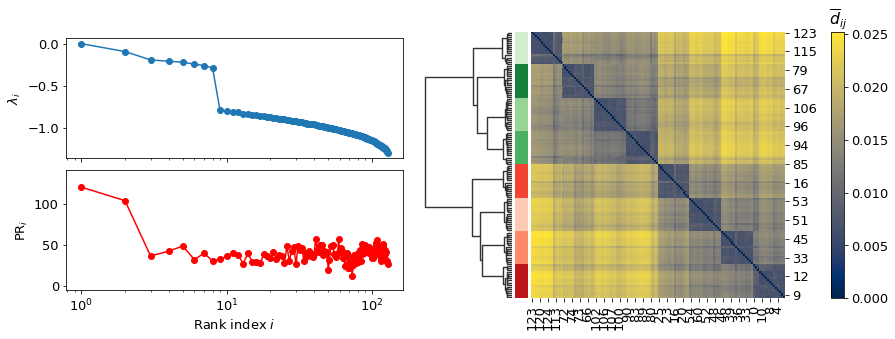

In [166]:
res_gn = distance.diffusion_distance(cp3, args=[1, 1], name=None, cs=cs)

DIFFUSION DISTANCE
- Compute laplacian...
1 1
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


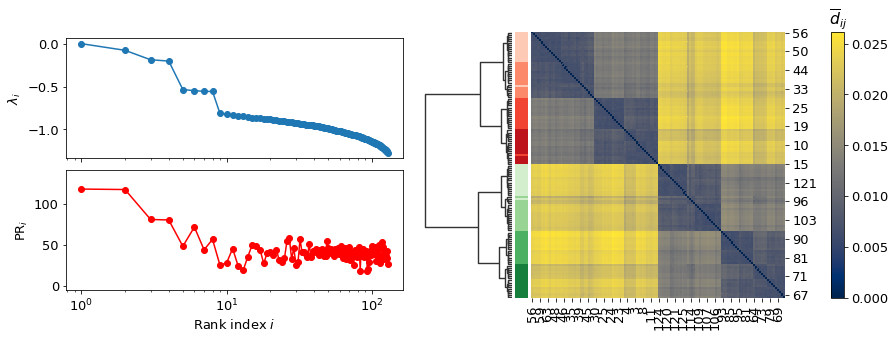

In [193]:
res_gn = distance.diffusion_distance(cp2, args=[1, 1], name=None, cs=cs)

# LFR

True
n_comms: 4


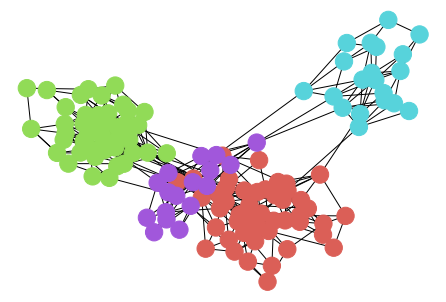

In [144]:
N = 128
tau1 = 3
tau2 = 1.5
mu = 0.08
G = nx.LFR_benchmark_graph(n, tau1, tau2, mu, min_degree=3, min_community=15, max_community=120, seed=10)
G.remove_edges_from(nx.selfloop_edges(G))
print(nx.is_connected(G))
lfr = nx.to_numpy_array(G)

### Get communities
comms = []

for i in range(N):
    tmp = G.nodes[i]['community']
    
    if tmp not in comms:
        comms.append(tmp)
        
print('n_comms:', len(comms))

### Reorder nodes
lfr = nx.to_numpy_array(G)
sizes = [len(list(i)) for i in comms]
comms = [list(i) for i in comms]
comms = np.concatenate(comms)
lfr = lfr[:,comms][comms]
comms = np.concatenate([[val]*size for val, size in enumerate(sizes)])

G = nx.from_numpy_array(lfr)
palette = hls_palette(len(np.unique(comms)))
row_colors = [palette[i] for i in comms]
nx.draw(G, node_color=row_colors)

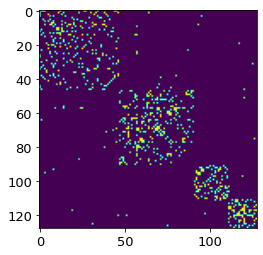

In [145]:
plt.imshow(mat)
plt.show()

# Neuronal dynamics

## 1. No self-interaction

In [544]:
gs = [0.3, 0.05, 0.02]
params = [[1,0,g] for g in gs]

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0, 0.3]


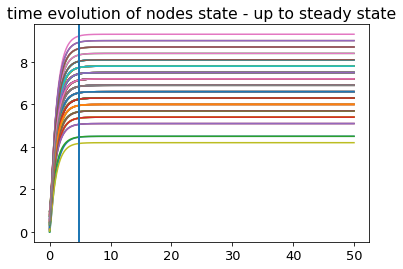

[1, 0, 0.3]
Normalizing jacobian - $\lambda_{max}=$1.0000778595717588
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


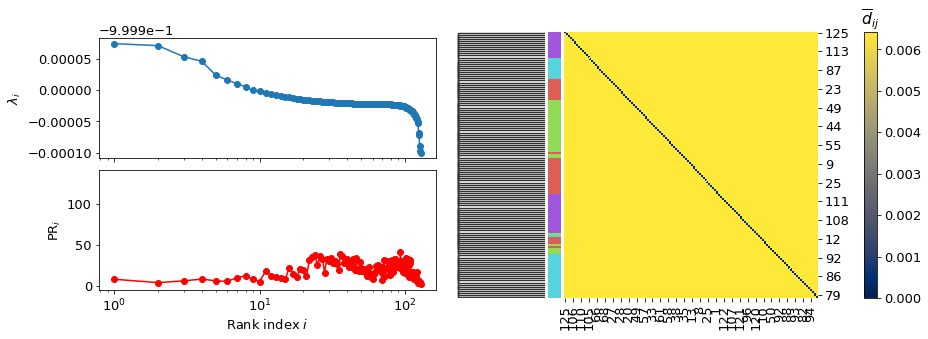

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0, 0.05]


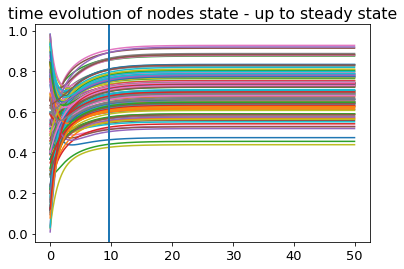

[1, 0, 0.05]
Normalizing jacobian - $\lambda_{max}=$1.2157733940128788
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


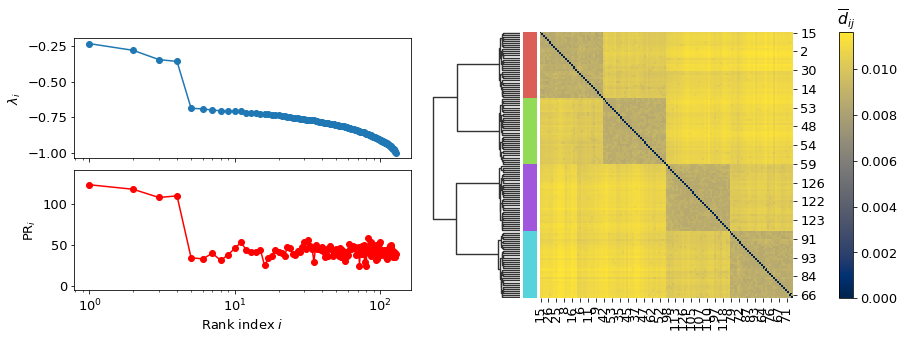

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0, 0.02]


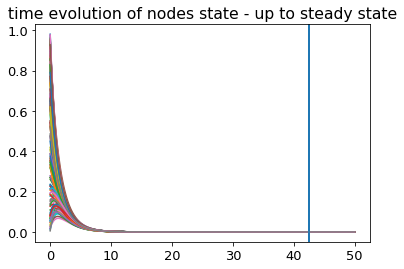

[1, 0, 0.02]
Normalizing jacobian - $\lambda_{max}=$1.1371231392713412
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


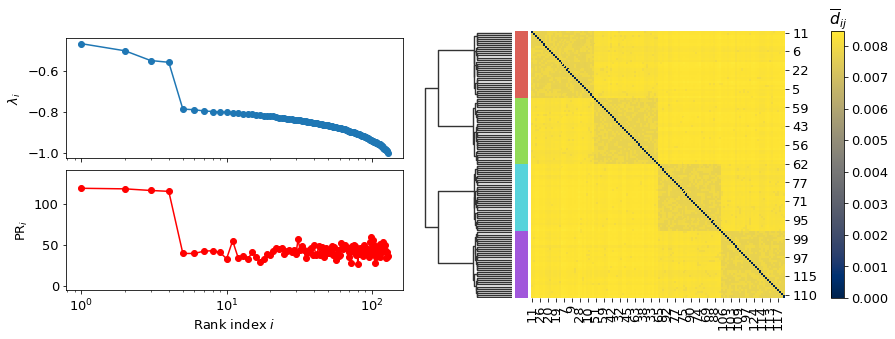

In [545]:
for param in params:
    res = distance.jacobian_distance(adj, 'Neuronal', norm=True, args=param, name=None, title=None, n_comms=4)

## 2. Adding self-interaction

In [552]:
ss = [2, 1, 0.01, -0.1, -1]
params = [[1,s,0.05] for s in ss]

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 2, 0.05]


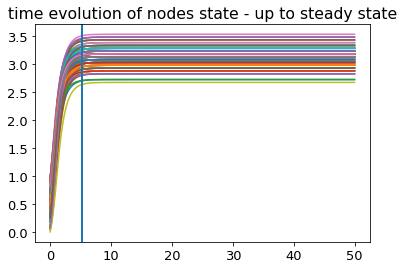

[1, 2, 0.05]
Normalizing jacobian - $\lambda_{max}=$0.9934792750806212
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


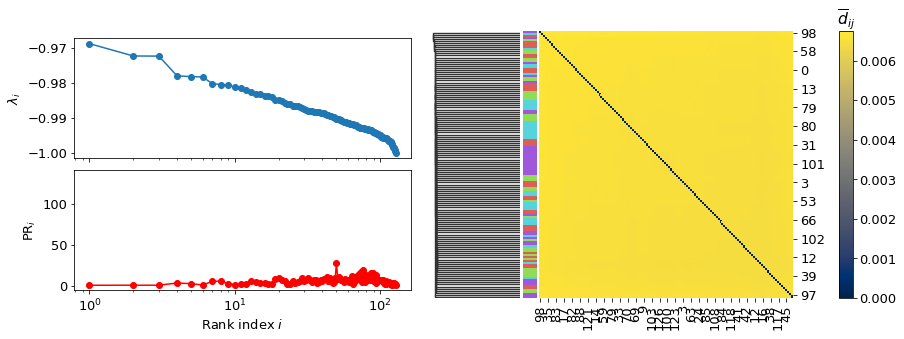

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 1, 0.05]


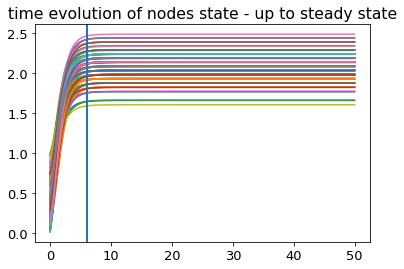

[1, 1, 0.05]
Normalizing jacobian - $\lambda_{max}=$0.9754498966558133
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


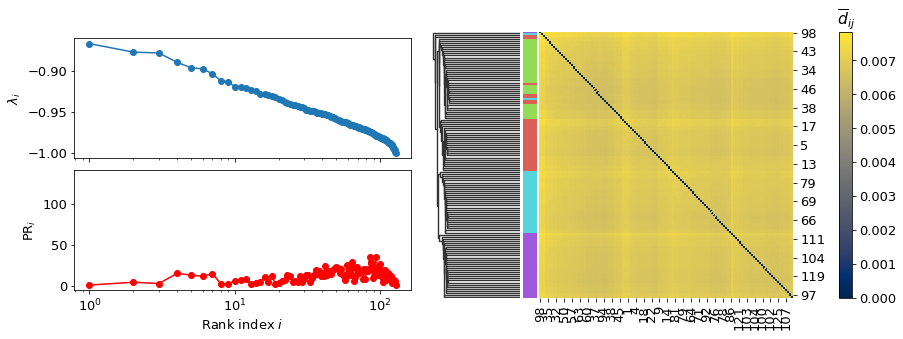

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.01, 0.05]


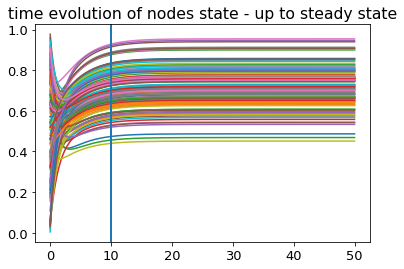

[1, 0.01, 0.05]
Normalizing jacobian - $\lambda_{max}=$1.2041298809369243
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


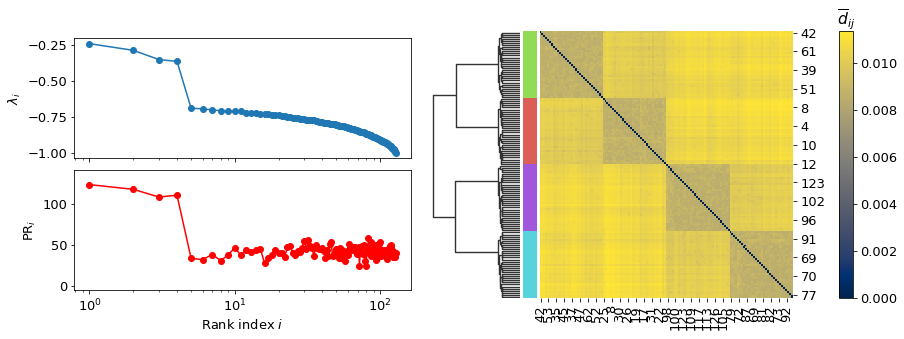

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, -0.1, 0.05]


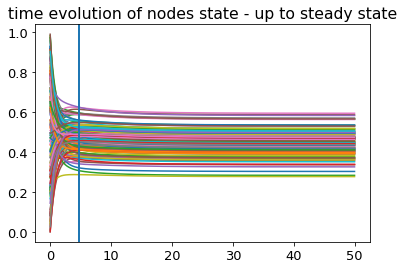

[1, -0.1, 0.05]
Normalizing jacobian - $\lambda_{max}=$1.3620986342397214
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


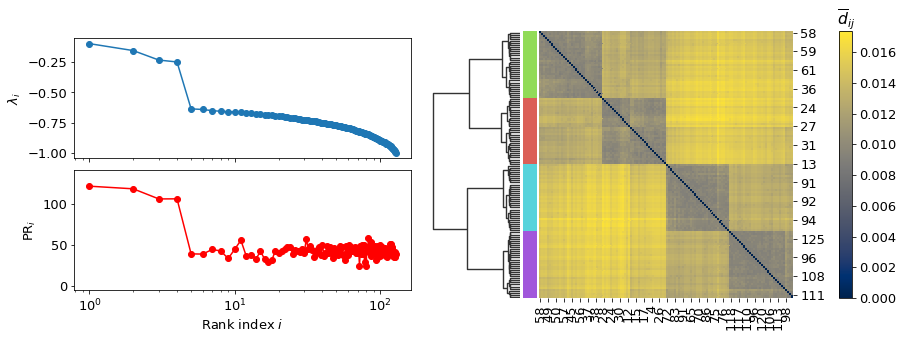

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, -1, 0.05]


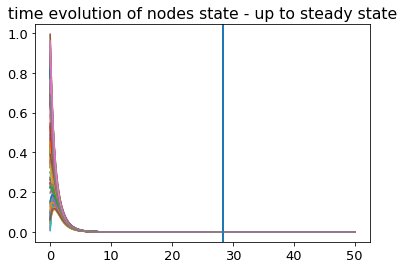

[1, -1, 0.05]
Normalizing jacobian - $\lambda_{max}=$2.342807848178354
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


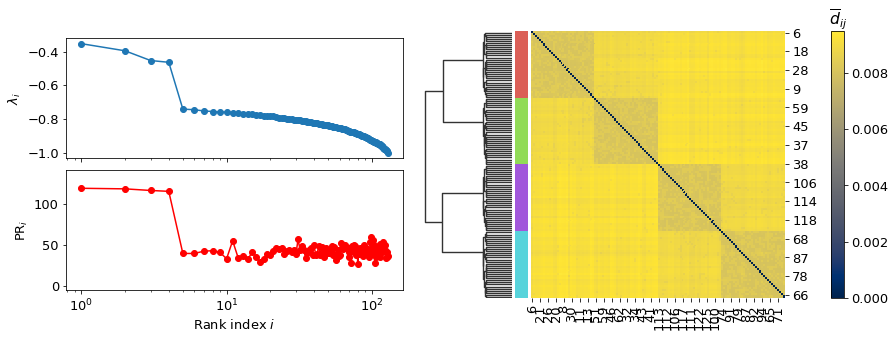

In [553]:
for param in params:
    res = distance.jacobian_distance(adj, 'Neuronal', norm=True, args=param, name=None, title=None, n_comms=4)

# Using other networks - cp3

True


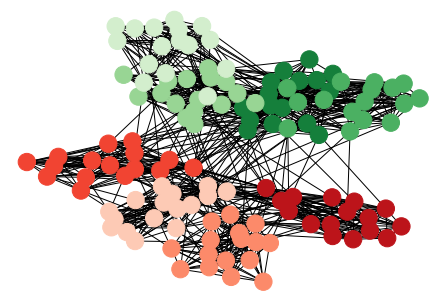

In [565]:
G3 = nx.from_numpy_array(cp3)
print(nx.is_connected(G3))
nx.draw(G3,node_color=cs) #,pos=nx.random_layout(G)

DIFFUSION DISTANCE
- Compute laplacian...
1 1
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


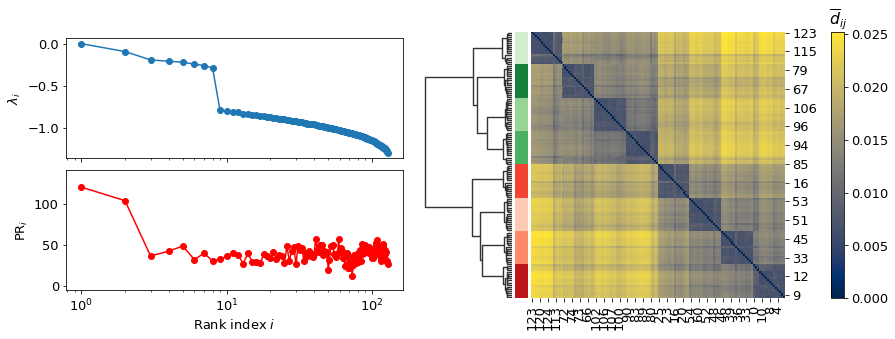

In [566]:
res_gn = distance.diffusion_distance(cp3, args=[1, 1], name=None, cs=cs)

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.01, 0.01]


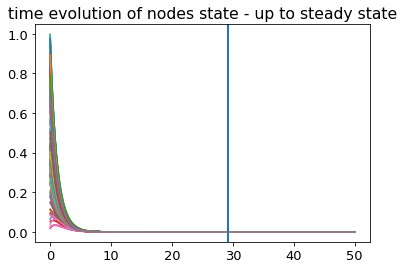

[1, 0.01, 0.01]
Normalizing jacobian - $\lambda_{max}=$1.0532217596903428
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


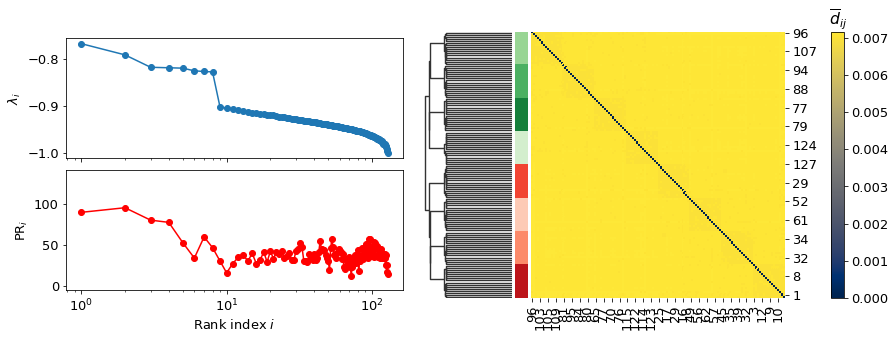

In [567]:
res = distance.jacobian_distance(cp3, 'Neuronal', norm=True, args=[1, 0.01, 0.01], name=None, title=None, cs=cs)

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.01, 0.06]


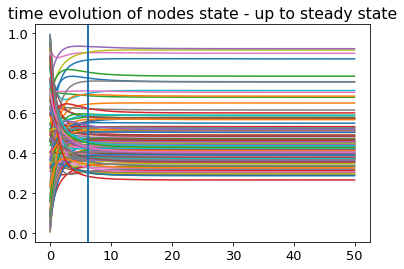

[1, 0.01, 0.06]
Normalizing jacobian - $\lambda_{max}=$1.2464060966378703
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


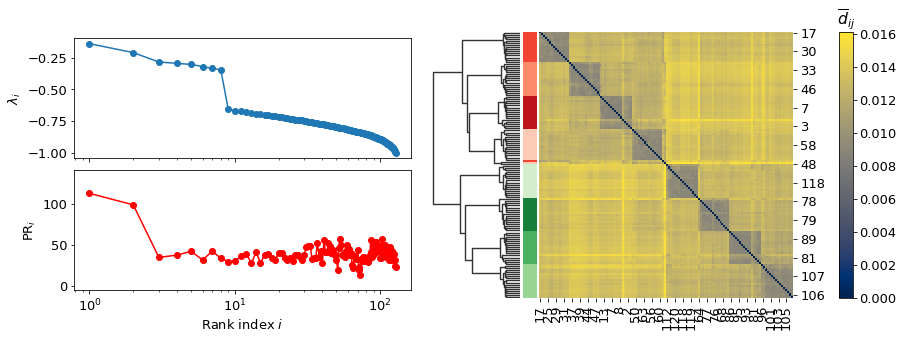

In [570]:
res = distance.jacobian_distance(cp3, 'Neuronal', norm=True, args=[1, 0.01, 0.06], name=None, title=None, cs=cs)

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.01, 0.08]


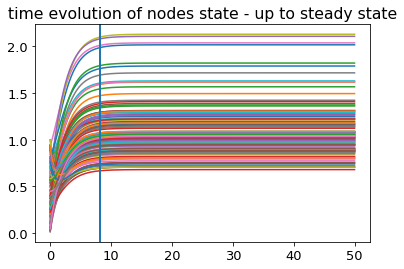

[1, 0.01, 0.08]
Normalizing jacobian - $\lambda_{max}=$1.13610019226423
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


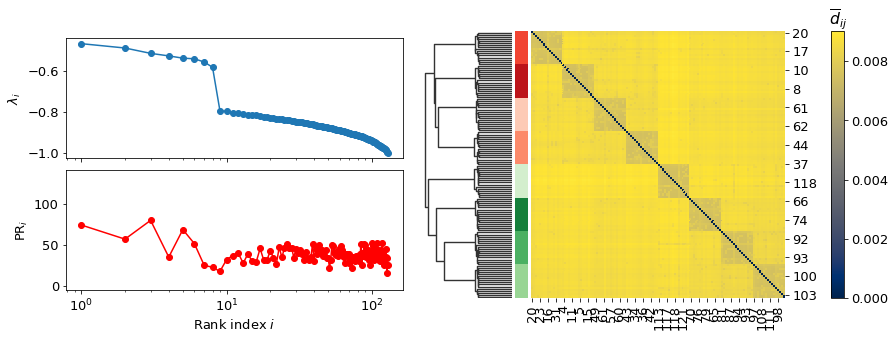

In [571]:
res = distance.jacobian_distance(cp3, 'Neuronal', norm=True, args=[1, 0.01, 0.08], name=None, title=None, cs=cs)

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.01, 0.1]


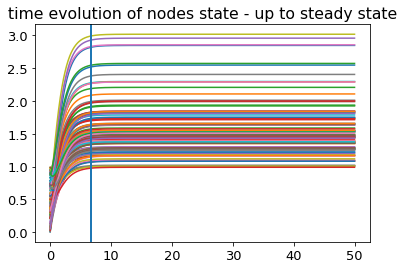

[1, 0.01, 0.1]
Normalizing jacobian - $\lambda_{max}=$1.0891558961325003
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


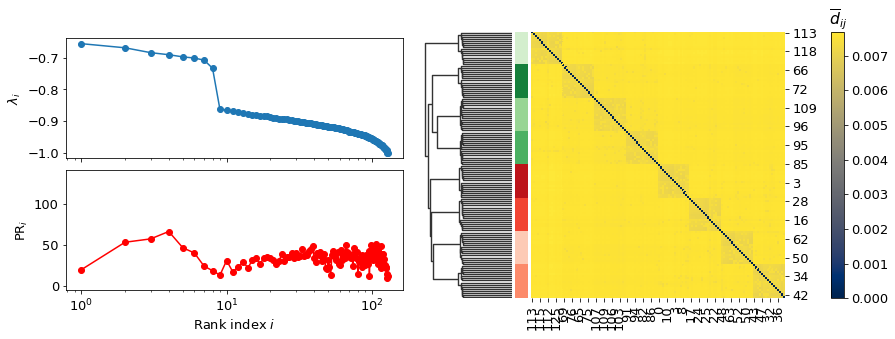

In [572]:
res = distance.jacobian_distance(cp3, 'Neuronal', norm=True, args=[1, 0.01, 0.1], name=None, title=None, cs=cs)

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 0.01, 0.5]


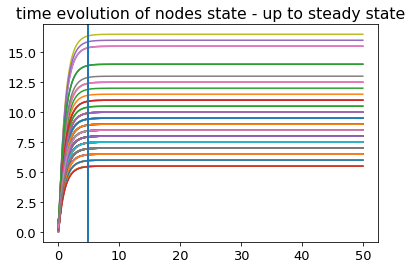

[1, 0.01, 0.5]
Normalizing jacobian - $\lambda_{max}=$1.0000205870330665
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:261: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


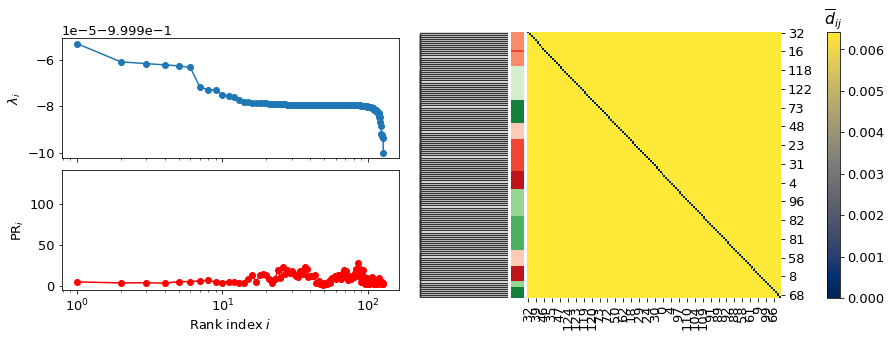

In [574]:
res = distance.jacobian_distance(cp3, 'Neuronal', norm=True, args=[1, 0.01, 0.5], name=None, title=None, cs=cs)

# Using other networks - LFR

True


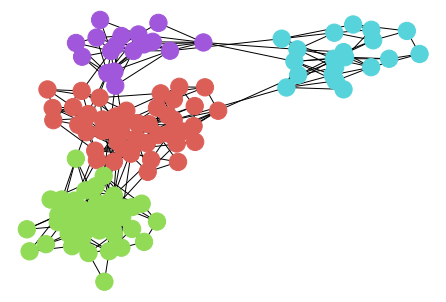

In [146]:
G = nx.from_numpy_array(lfr)
print(nx.is_connected(G))
nx.draw(G, node_color=row_colors) #,pos=nx.random_layout(G)

DIFFUSION DISTANCE
- Compute laplacian...
1 1
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


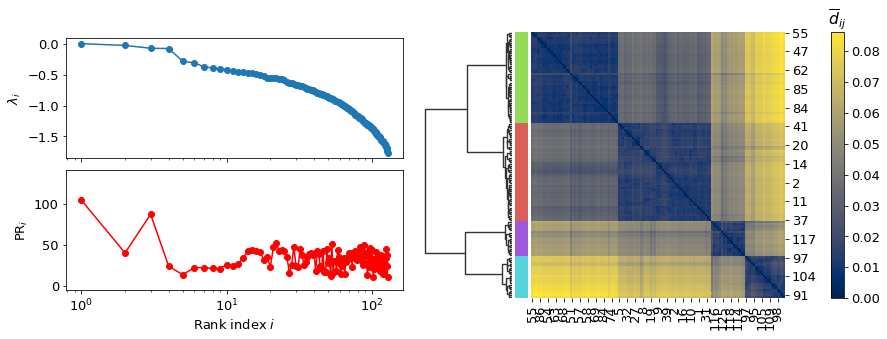

In [149]:
res_gn = distance.diffusion_distance(lfr, args=[1, 1], name=None, comms=comms)

JACOBIAN DISTANCE
Dynamics: NoisyVM
[0.0, 1, 1.0]


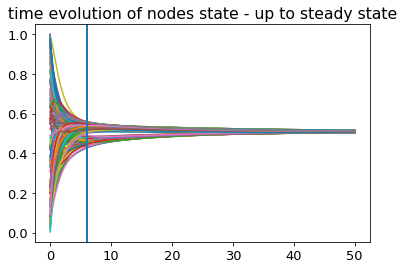

[0.0, 1, 1.0]
Normalizing jacobian - $\lambda_{max}=$1.762694064012662
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


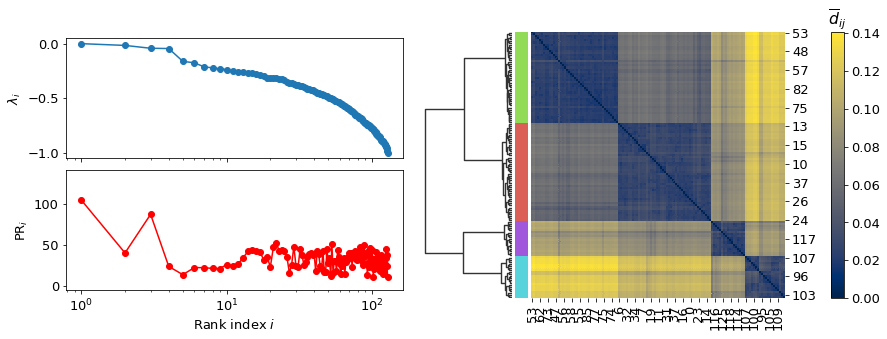

JACOBIAN DISTANCE
Dynamics: NoisyVM
[0.0, 2, 1.0]


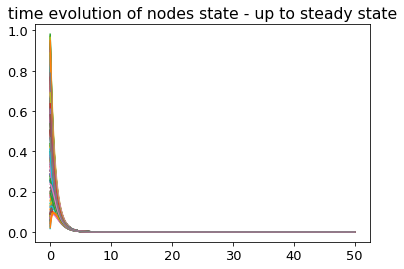

[0.0, 2, 1.0]
Normalizing jacobian - $\lambda_{max}=$2.7626940640126696
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


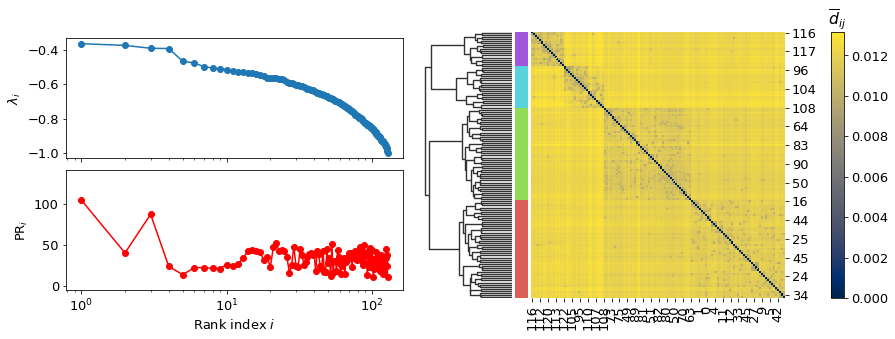

JACOBIAN DISTANCE
Dynamics: NoisyVM
[0.0, 3, 1.0]


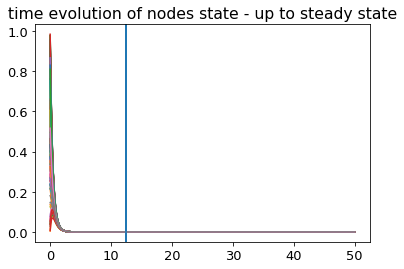

[0.0, 3, 1.0]
Normalizing jacobian - $\lambda_{max}=$3.7626940640126594
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


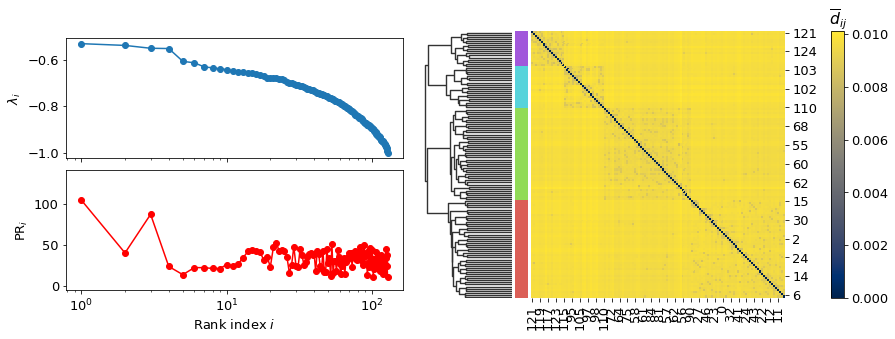

In [155]:
params = [1, 2, 3]
params = [[0.,i,1.] for i in params]

for param in params:
    res = distance.jacobian_distance(lfr, 'NoisyVM', norm=True, args=param, name=None, title=None, comms=comms)

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 1]


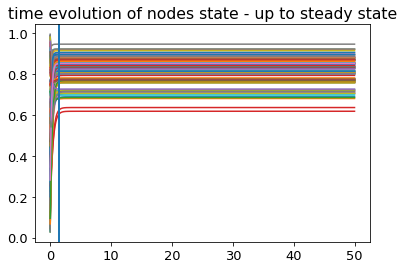

[1, 1]
Normalizing jacobian - $\lambda_{max}=$18.79670801973915
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


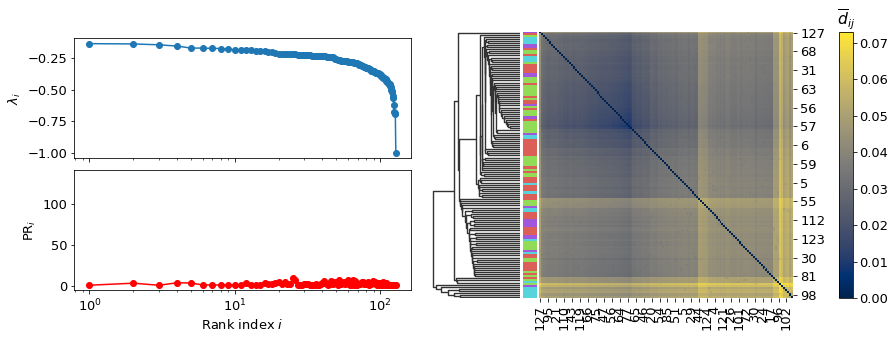

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.5]


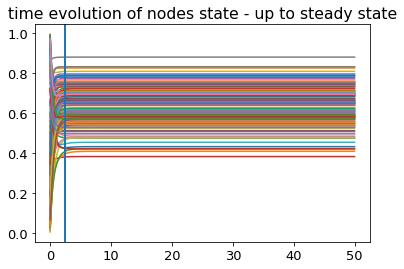

[1, 0.5]
Normalizing jacobian - $\lambda_{max}=$8.457615626006625
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


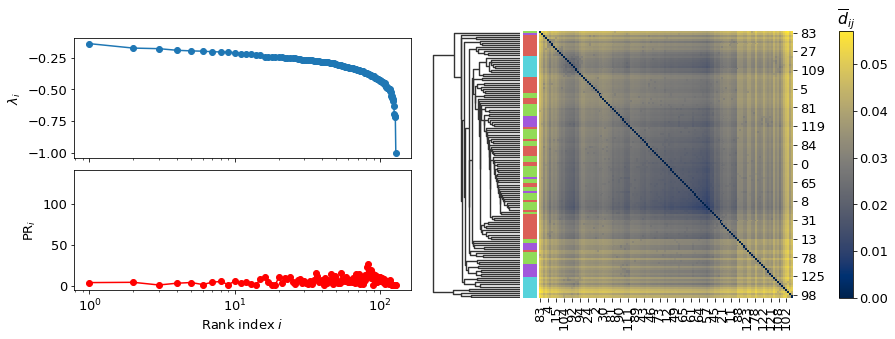

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.1]


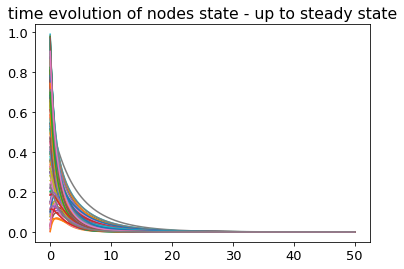

[1, 0.1]
Normalizing jacobian - $\lambda_{max}=$1.497393863562797
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


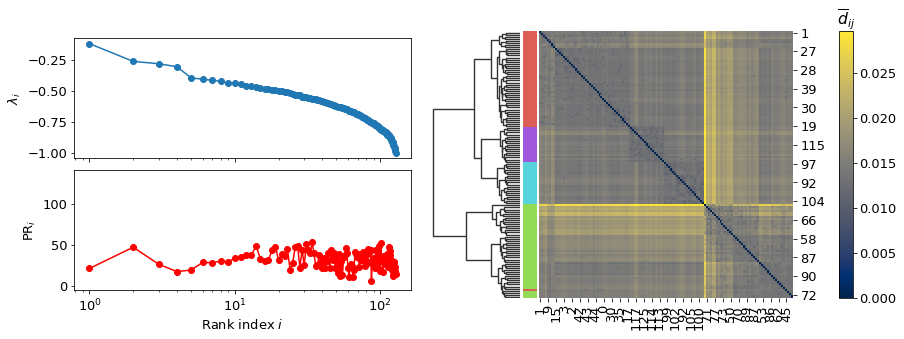

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.05]


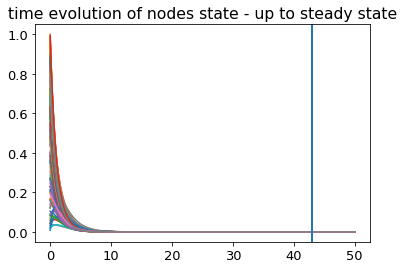

[1, 0.05]
Normalizing jacobian - $\lambda_{max}=$1.248692944886642
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


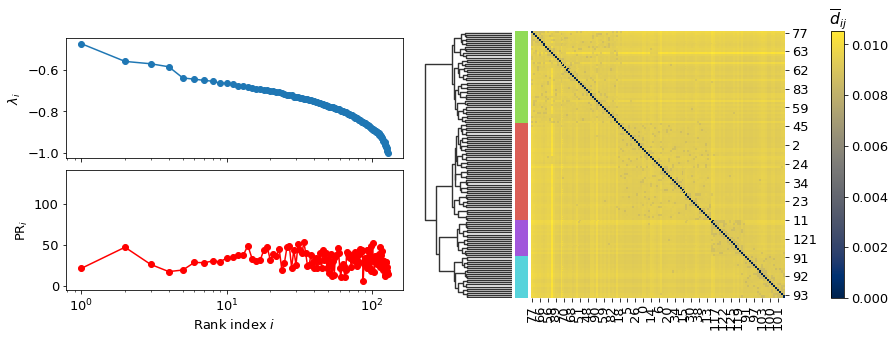

In [156]:
params = [1, 0.5, 0.1, 0.05]
params = [[1,i] for i in params]

for param in params:
    res = distance.jacobian_distance(lfr, 'Epidemics', norm=True, args=param, name=None, title=None, comms=comms)

In [628]:
from utils.Dynamics import NoisyVM as NVM

In [638]:
jac = NVM.Jacobian_NoisyVM(nx.from_numpy_array(mat), np.zeros(N))

In [639]:
jac

array([[-1.        ,  0.11111111,  0.11111111, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.11111111, -1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2       ,  0.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.        ,
         0.25      ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.14285714,
        -1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -1.        ]])

In [658]:
lap = np.eye(N) - mat / np.sum(mat, axis=1)[:,None]

In [659]:
lap

array([[ 1.        , -0.11111111, -0.11111111, ...,  0.        ,
         0.        ,  0.        ],
       [-0.11111111,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.2       ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.25      ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.14285714,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [660]:
jac + lap

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [644]:
G = nx.from_numpy_array(mat)

In [652]:
G.degree(N-2)

7

In [645]:
nx.to_numpy_array(G)

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [650]:
np.sum(mat, axis=1)

array([ 9.,  9.,  5.,  7.,  4.,  5.,  7.,  6., 13.,  7.,  7.,  6.,  8.,
        6., 10.,  4.,  5.,  4.,  5.,  6.,  6.,  6.,  5.,  4.,  4.,  9.,
        4.,  4.,  5.,  5.,  4.,  7.,  4.,  5.,  7.,  4.,  4.,  4.,  7.,
        5.,  4.,  4.,  3.,  7.,  3.,  6.,  7.,  9.,  4.,  8.,  8.,  5.,
       10.,  5.,  5.,  3.,  9., 21.,  5.,  5.,  8.,  8.,  5.,  8., 12.,
        8.,  7.,  6.,  6., 15.,  6., 14.,  4.,  6.,  4.,  8.,  7., 14.,
        4.,  3., 10.,  4.,  4.,  3.,  5.,  5.,  3.,  7.,  3.,  5.,  5.,
        3.,  8.,  7.,  5.,  6.,  3.,  5.,  3.,  4.,  4.,  4.,  3.,  8.,
        6.,  4.,  7.,  4.,  4.,  6.,  7.,  8.,  4.,  3.,  6.,  6.,  4.,
       10.,  4.,  7., 12.,  4.,  4.,  4.,  3.,  4.,  7.,  3.])

In [655]:
list(G.neighbors(0))

[1, 2, 3, 12, 26, 27, 34, 44, 45]

In [656]:
mat[0]

array([0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
print(-0.)

-0.0


In [113]:
aa = np.sum(mat,axis=1)

In [110]:
G = nx.from_numpy_array(mat)

In [114]:
bb = [i[1] for i in G.degree]
bb = np.array(bb)

In [115]:
aa - bb

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0., -1., -1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0., -1.,
        0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [116]:
mat

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [118]:
mat[7]

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])